In [5]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dataframe_image as dfi

In [20]:
# Boolean Dataframe
# 1(True) if Used, else 0(False)
plt.rcParams['figure.figsize'] = (10,25)
df_plastic = pd.read_csv("./data/food_plastic.csv")
df_plastic = df_plastic.fillna(False).rename(columns={'플라스틱' : "제품"})
df_plastic.iloc[:,1:] = df_plastic.iloc[:,1:].astype(int)
colors = sns.color_palette('deep',10).as_hex()

def coloring(x, color):
    color = f'background-color:{color}'
    is_1 = x == 1
    return [color if b else '' for b in is_1]

df_plastic_image = df_plastic.style.apply(coloring, color='yellow')
df_plastic_image

,제품,PE,Other(비닐류),HDPE,PP,OPP,PET,EVA,PS,LDPE,ABS
0,원두커피,1,1,0,0,0,0,0,0,0,0
1,커피믹스,1,0,0,0,0,0,0,0,0,0
2,벌꿀,0,0,1,1,0,1,0,0,0,0
3,음료수,0,0,1,1,0,1,0,0,0,0
4,물,0,0,1,1,0,1,0,0,0,0
5,"맥주, 막걸리, 소주",0,1,1,1,1,1,0,0,0,0
6,"우유, 두유",1,0,0,1,0,1,1,0,0,0
7,"푸딩, 요거트, 요구르트",1,0,0,1,0,0,1,1,0,0
8,"설탕, 소금, 깨, 후추, 다진마늘",1,1,0,1,0,0,0,1,0,0
9,생강가루,0,1,0,0,0,0,0,0,1,1


In [21]:
# Save Dataframe as image
dfi.export(df_plastic_image, './df_plastic.png', max_cols=-1, max_rows=-1, dpi=500)

objc[86309]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22a2e72e0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/108.0.5359.98/Libraries/libGLESv2.dylib (0x10dce3f38). One of the two will be used. Which one is undefined.
[1213/001003.442464:INFO:headless_shell.cc(623)] Written to file /var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/tmpbzyvoy0r/temp.png.
objc[86325]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22a2e72e0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/108.0.5359.98/Libraries/libGLESv2.dylib (0x10c307f38). One of the two will be used. Which one is undefined.
[1213/001006.675392:INFO:headless_shell.cc(623)] W

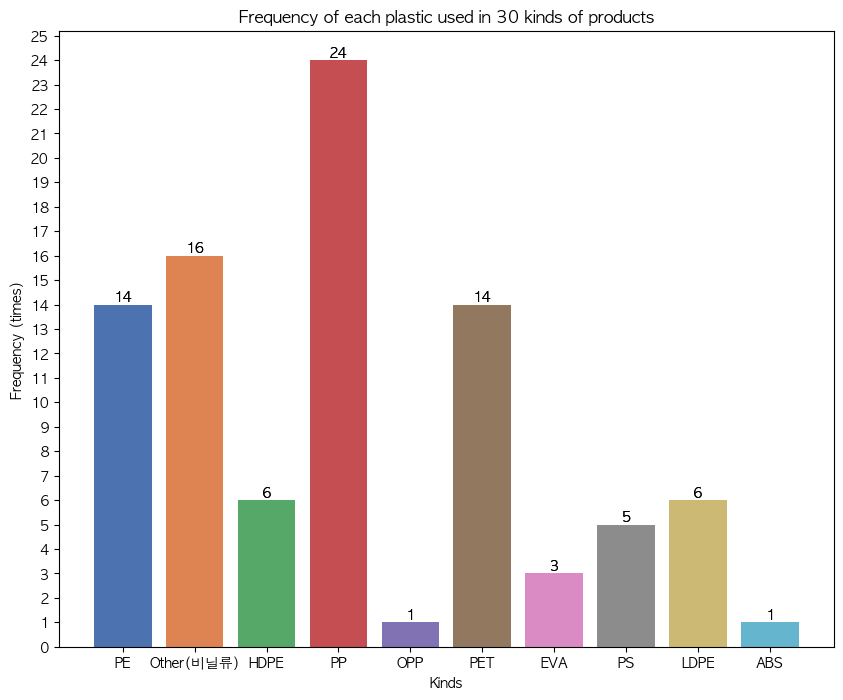

In [38]:
plt.style.use("default")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'AppleGothic'  # For Korean Language


kind_plastics = df_plastic.columns[1:].to_list()
freq_plastics = df_plastic.iloc[:,1:].sum().to_list()
plt.bar(kind_plastics, freq_plastics, color=colors)

plt.yticks(range(0,26))
plt.xlabel("Kinds")
plt.ylabel("Frequency (times)")
plt.title("Frequency of each plastic used in 30 kinds of products")

for i in range(10):
    height = freq_plastics[i]
    plt.text(kind_plastics[i], height, height, ha='center', va='bottom', size=10)


plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 10
kind_plastics = df_plastic.columns[1:].to_list()
freq_plastics = df_plastic.iloc[:,1:].sum().to_list()
plt.bar(kind_plastics, freq_plastics, color=colors)
plt.yticks(range(0,26))
plt.xlabel("Kinds")
plt.ylabel("Frequency (times)")
plt.title("Frequency of each plastic used in 30 kinds of products")

for i in range(10):
    height = freq_plastics[i]
    plt.text(kind_plastics[i], height, height, ha='center', va='bottom', size=10)

# Savefig
#plt.savefig('./plots/plastic_kinds_freq.png', dpi=300, bbox_inches='tight')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_85222/1496505845.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


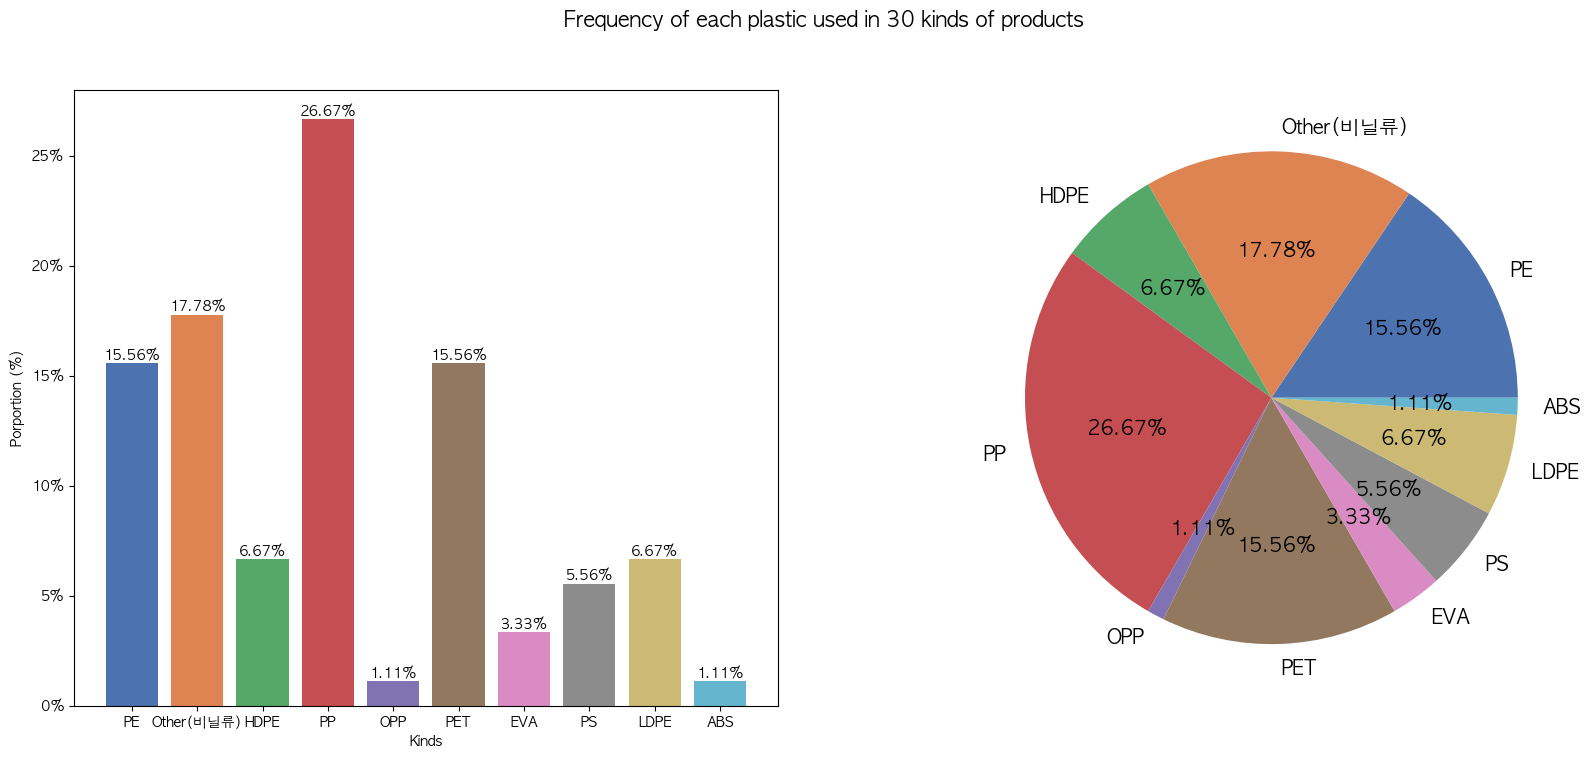

In [41]:
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 10
total_cells = 10 * 31
freq_plas_percent = [i/sum(freq_plastics) for i in freq_plastics]

plt.subplot(1,2,1)
plt.bar(kind_plastics, freq_plas_percent, color=colors)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])
for i in range(10):
    height = freq_plas_percent[i]
    plt.text(kind_plastics[i], height, str(round(freq_plas_percent[i] * 100, 2)) + "%", ha='center', va='bottom')
plt.xlabel("Kinds")
plt.ylabel("Porportion (%)")

plt.subplot(1,2,2)
plt.pie(freq_plastics,
        autopct=lambda p : '{:.2f}%'.format(p),
        colors=colors, labels=kind_plastics,
        textprops={'size' : 14})
plt.suptitle("Frequency of each plastic used in 30 kinds of products", fontsize=15)

# Savefig
plt.savefig("./plots/plastic_kinds_percent.png", dpi=300, bbox_inches='tight')